# Decision Trees and Random Forests in Python

We will work on Kyphosis (a type of deformation in the back) data. The data consists of four columns 

- **Kyphosis:** a factor with levels absent present indicating if a kyphosis  was present after the operation and thats what we will predict
- **Age:** in months
- **Number:** the number of vertebrae involved
- **Start:** the number of the first (topmost) vertebra operated on.

In [1]:
import pandas as pd
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [2]:

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Understand the Data

We'll just check out a simple pairplot for this small dataset.

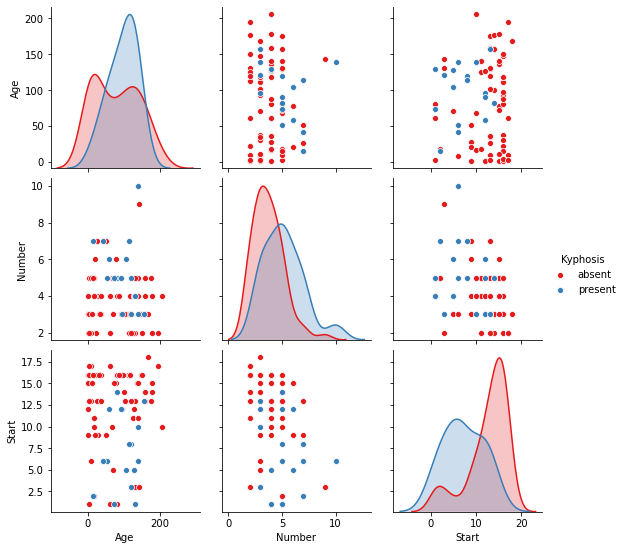

In [3]:
import seaborn as sns
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

## Decision Trees

We'll start just by training a single decision tree. After we understand how a tree works, we can transfer this knowledge to build a forest of trees

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [24]:
predictions = dtree.predict(X_test)
predictions

array(['present', 'absent', 'absent', 'absent', 'present', 'present',
       'absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'present',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent'], dtype=object)

In [25]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.83      0.86        18
     present       0.62      0.71      0.67         7

    accuracy                           0.80        25
   macro avg       0.75      0.77      0.76        25
weighted avg       0.81      0.80      0.80        25

[[15  3]
 [ 2  5]]


<BarContainer object of 3 artists>

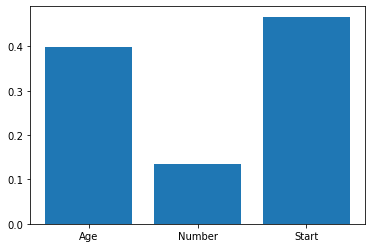

In [26]:
dtree.feature_importances_
plt.bar(X.columns, dtree.feature_importances_)

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

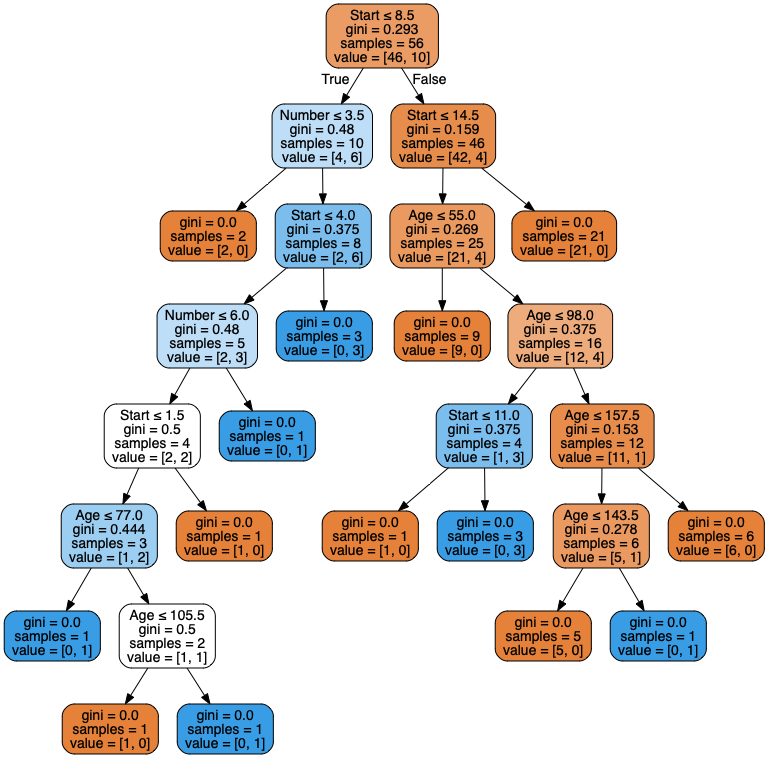

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forests

Now let's compare the decision tree model to a random forest.

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'present',
       'absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent'], dtype=object)

In [30]:
rfc.predict_proba(X_test)

array([[0.55, 0.45],
       [0.99, 0.01],
       [0.79, 0.21],
       [0.62, 0.38],
       [0.32, 0.68],
       [0.44, 0.56],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.4 , 0.6 ],
       [0.79, 0.21],
       [0.31, 0.69],
       [0.64, 0.36],
       [0.95, 0.05],
       [0.88, 0.12],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.59, 0.41],
       [0.69, 0.31],
       [0.87, 0.13],
       [0.87, 0.13],
       [1.  , 0.  ],
       [0.33, 0.67],
       [0.6 , 0.4 ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[17  1]
 [ 3  4]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.85      0.94      0.89        18
     present       0.80      0.57      0.67         7

    accuracy                           0.84        25
   macro avg       0.82      0.76      0.78        25
weighted avg       0.84      0.84      0.83        25



<BarContainer object of 3 artists>

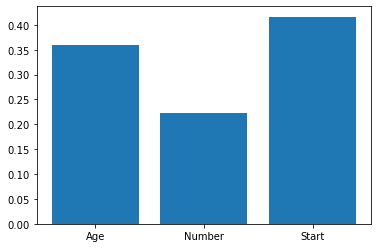

In [33]:
dtree.feature_importances_
plt.bar(X.columns, rfc.feature_importances_)

In [ ]:
nn_pred , log_pred, rf_pred
pred = (nn_pred + log_pred+ rf_pred)/3

In [ ]:
sum_pred = nn_pred + log_pred+ rf_pred
final_pred = sum_pred>=2